In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_json("raw0.json", lines=True)
df.head(3)

,created_date,current_time,in_reply_to_status_id_str,in_reply_to_status_id,created_at,in_reply_to_user_id_str,source,retweeted_status,retweet_count,retweeted,...,contributors,user,quoted_status,quoted_status_id,quoted_status_permalink,possibly_sensitive,display_text_range,quoted_status_id_str,extended_entities,extended_tweet
0,2018-06-14 04:14:25,2018-06-14 02:14:25.098,NaN,NaN,2018-06-14 02:14:24+00:00,NaN,"<a href=""http://twitter.com/download/iphone"" r...",{'extended_entities': {'media': [{'display_url...,0,False,...,NaN,"{'utc_offset': None, 'friends_count': 826, 'pr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-14 04:14:25,2018-06-14 02:14:25.150,NaN,NaN,2018-06-14 02:14:24+00:00,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,0,False,...,NaN,"{'utc_offset': None, 'friends_count': 686, 'pr...",{'extended_tweet': {'extended_entities': {'med...,1.007083e+18,{'expanded': 'https://twitter.com/flubase/stat...,0.0,"[0, 27]",1.007083e+18,NaN,NaN
2,2018-06-14 04:14:25,2018-06-14 02:14:25.165,NaN,NaN,2018-06-14 02:14:24+00:00,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",{'quoted_status': {'in_reply_to_status_id_str'...,0,False,...,NaN,"{'utc_offset': None, 'friends_count': 44, 'pro...","{'in_reply_to_status_id_str': None, 'in_reply_...",1.007082e+18,{'expanded': 'https://twitter.com/ESPNLosAngel...,0.0,NaN,1.007082e+18,NaN,NaN


# Description des variables

## Métadonnées temporelles

> created_date : Date de création du tweet (exemple : 2018-06-14).

> current_time : Heure actuelle de récupération des données

> created_at : Date et heure de publication du tweet au format UTC avec fuseau horaire

> timestamp_ms : Timestamp du tweet en millisecondes

In [ ]:
df[['created_date', 'current_time', 'created_at', 'timestamp_ms']].head(5)

,created_date,current_time,created_at,timestamp_ms
0,2018-06-14 04:14:25,2018-06-14 02:14:25.098,2018-06-14 02:14:24+00:00,2018-06-14 02:14:24.693
1,2018-06-14 04:14:25,2018-06-14 02:14:25.150,2018-06-14 02:14:24+00:00,2018-06-14 02:14:24.732
2,2018-06-14 04:14:25,2018-06-14 02:14:25.165,2018-06-14 02:14:24+00:00,2018-06-14 02:14:24.837
3,2018-06-14 04:14:25,2018-06-14 02:14:25.499,2018-06-14 02:14:25+00:00,2018-06-14 02:14:25.201
4,2018-06-14 04:14:26,2018-06-14 02:14:26.051,2018-06-14 02:14:25+00:00,2018-06-14 02:14:25.791


> On remarque ci-dessous que l'attribut **created_date** n'est pas du même type que les autres variables temporelles, ce qui peut etre une contrainte selon le traitement que l'on veut faire plus tard

In [ ]:
df[['created_date', 'current_time', 'created_at', 'timestamp_ms']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   created_date  1999 non-null   object             
 1   current_time  1999 non-null   datetime64[ns]     
 2   created_at    1999 non-null   datetime64[ns, UTC]
 3   timestamp_ms  1999 non-null   datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), object(1)
memory usage: 62.6+ KB


## Informations sur les réponses et interactions

> in_reply_to_status_id_str : ID du tweet auquel la personne répond

> in_reply_to_status_id : ID numérique du tweet auquel la personne répond.

> in_reply_to_user_id_str : ID de l'utilisateur auquel le tweet répond

> in_reply_to_user_id : ID numérique de l'utilisateur auquel le tweet répond.

> in_reply_to_screen_name : Nom d'utilisateur (handle) de la personne à qui le tweet répond.



In [ ]:
df[['in_reply_to_status_id_str', 'in_reply_to_status_id', 'in_reply_to_user_id_str', 'in_reply_to_user_id', 'in_reply_to_screen_name']].head(5)

,in_reply_to_status_id_str,in_reply_to_status_id,in_reply_to_user_id_str,in_reply_to_user_id,in_reply_to_screen_name
0,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,None
3,NaN,NaN,NaN,NaN,None
4,NaN,NaN,NaN,NaN,None


> On voit ci-dessous que sur un fichier contenant 2000 tweet, on voit que plus de 98% des données de ces variables sont nulles.

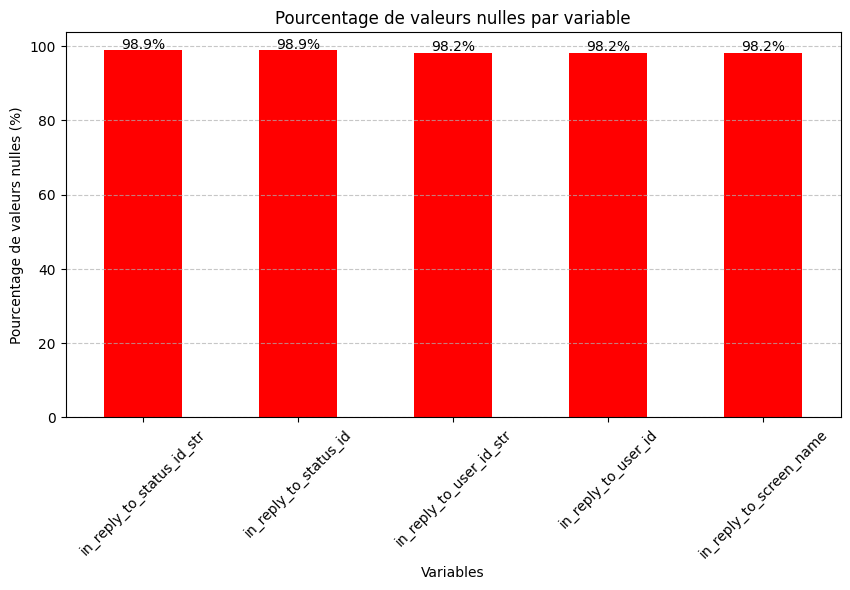

In [13]:
def check_null_values(df, columns_to_check):

  missing_values = df[columns_to_check].isnull().sum()

  missing_percent = (missing_values / len(df)) * 100
  missing_percent = missing_percent[missing_percent > 0]

  plt.figure(figsize=(10, 5))
  missing_percent.plot(kind='bar', color='red')
  plt.title("Pourcentage de valeurs nulles par variable")
  plt.xlabel("Variables")
  plt.ylabel("Pourcentage de valeurs nulles (%)")
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  for i, v in enumerate(missing_percent):
      plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

  plt.show()

columns_to_check = ['in_reply_to_status_id_str', 'in_reply_to_status_id',
                    'in_reply_to_user_id_str', 'in_reply_to_user_id',
                    'in_reply_to_screen_name']
check_null_values(df, columns_to_check)

 ## Source et statut du tweet

> source : Client ou plateforme utilisée pour publier le tweet

> retweeted_status : Objet contenant les détails du tweet retweeté si c'est un retweet (sinon NaN).

> retweet_count : Nombre de fois que le tweet a été retweeté.

> retweeted : Booléen indiquant si ce tweet a déjà été retweeté par l’utilisateur qui récupère les données.

In [ ]:
df[['source', 'retweeted_status', 'retweet_count', 'retweeted']].head(5)

,source,retweeted_status,retweet_count,retweeted
0,"<a href=""http://twitter.com/download/iphone"" r...",{'extended_entities': {'media': [{'display_url...,0,False
1,"<a href=""http://twitter.com/download/iphone"" r...",NaN,0,False
2,"<a href=""http://twitter.com/#!/download/ipad"" ...",{'quoted_status': {'in_reply_to_status_id_str'...,0,False
3,"<a href=""http://twitter.com/download/iphone"" r...",{'extended_tweet': {'extended_entities': {'med...,0,False
4,"<a href=""http://twitter.com/download/android"" ...",{'extended_entities': {'media': [{'display_url...,0,False


> On voit ci-dessous que l'on a plus de 30% des valeurs de la colonne retweeted_status qui est vide.

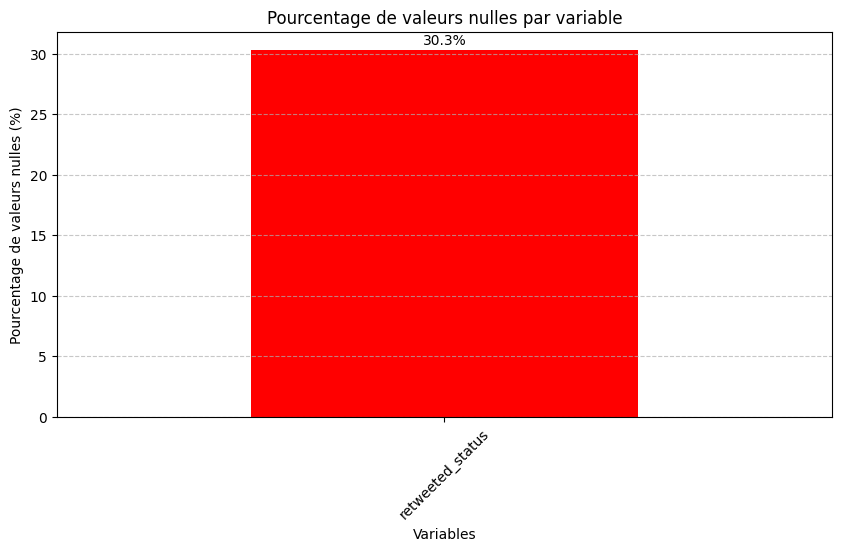

In [ ]:
columns_to_check = ['source', 'retweeted_status', 'retweet_count', 'retweeted']
check_null_values(df, columns_to_check)

> On voit également ci-dessous que la variable 'retweet_count' ne contient que la valeur 0 dans tout le fichier

In [ ]:
df[df['retweet_count'] == 0]['retweet_count'].value_counts()

,count
retweet_count,
0,1999


## Informations géographiques

> geo : Coordonnées géographiques fournies par l’utilisateur s’il les a activées (sinon None).

> coordinates : Coordonnées GPS sous forme de liste [longitude, latitude]
> place : Lieu déclaré par l’utilisateur (ex : ville, pays).

In [ ]:
df[['geo', 'coordinates']].head(5)

,geo,coordinates
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None


> Pratiquement l'entièreté du jeu de données contient des valeurs nulles pour ces deux variables qui sont donc pas du tout utilisées.

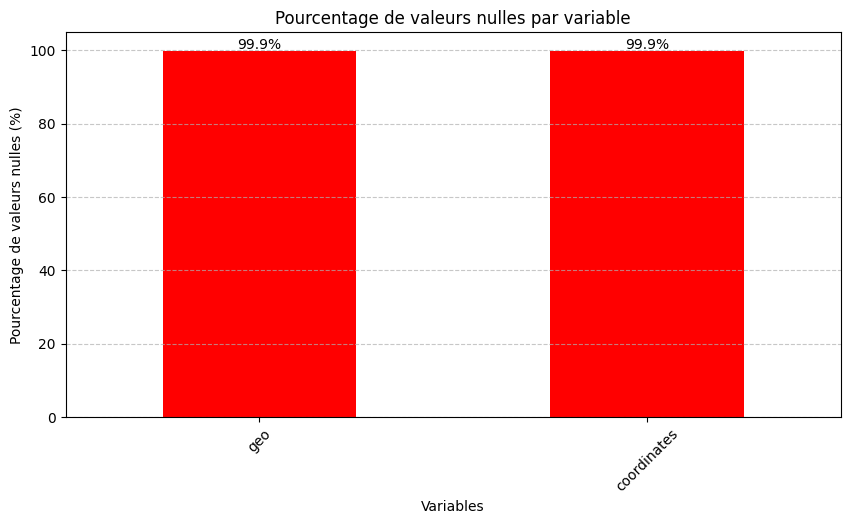

In [ ]:
check_null_values(df, ['geo', 'coordinates'])

## Identifiants du tweet

  

> id_str : Identifiant unique du tweet.

> id : Identifiant numérique unique du tweet.

> Remarque : on constate également que pour chaque ligne l'ID n'est pas le même. Sur la documentation de X, il est dit qu'il est préférable d'utiliser la variable id plutot que id_str

In [10]:
df[['id_str', 'id']].head(5)

,id_str,id
0,1007083805889449984,1007083805889449985
1,1007083806053068800,1007083806053068801
2,1007083806493249536,1007083806493249536
3,1007083808020189184,1007083808020189185
4,1007083810494799872,1007083810494799872


## Engagement et interactions

> favorite_count : Nombre de likes (favoris) reçus par le tweet.

> favorited : Booléen indiquant si l’utilisateur qui collecte les données a liké le tweet.

> quote_count : Nombre de fois où ce tweet a été cité dans d'autres tweets.

> reply_count : Nombre de réponses reçues par le tweet.

> truncated : Indique si le texte du tweet est tronqué (True si un extended_tweet est disponible).

In [11]:
df[['favorite_count', 'favorited', 'quote_count', 'reply_count', 'truncated']].head(5)

,favorite_count,favorited,quote_count,reply_count,truncated
0,0,False,0,0,False
1,0,False,0,0,False
2,0,False,0,0,False
3,0,False,0,0,False
4,0,False,0,0,False


> On voit ci-dessous que pour chacune de ces variables, il n'ya qu'une valeurs existante

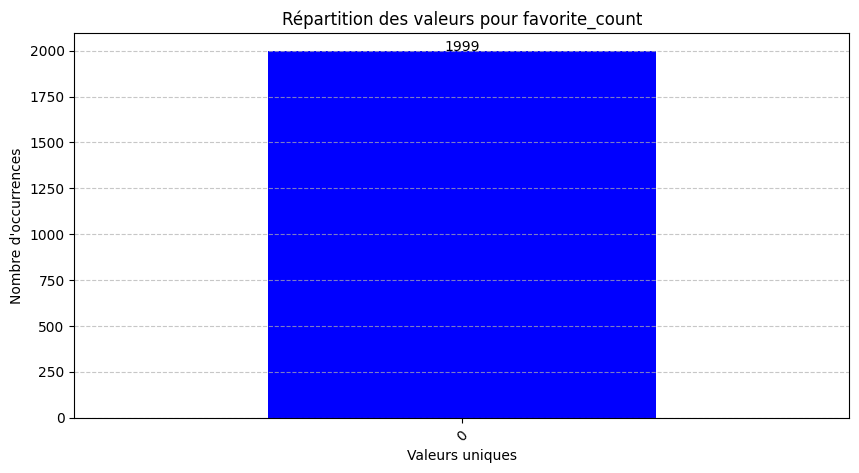

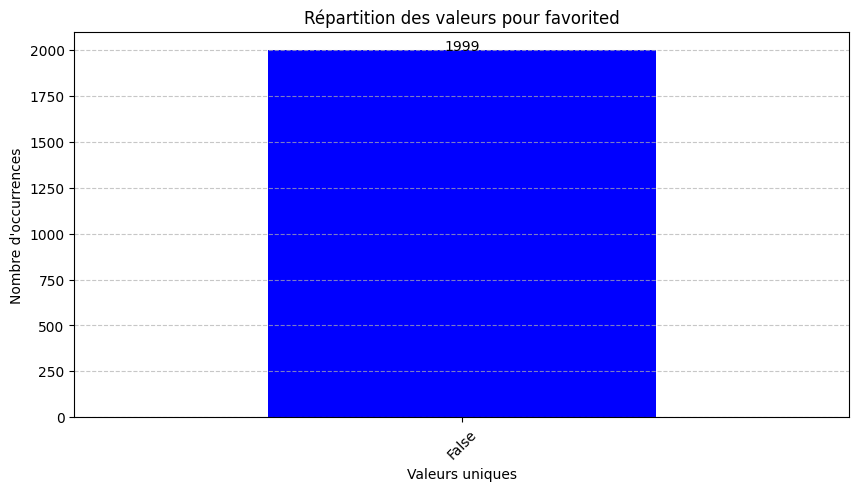

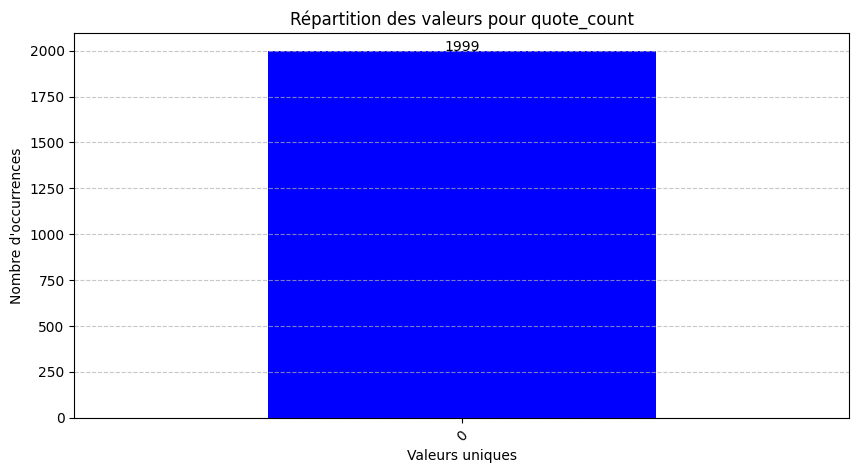

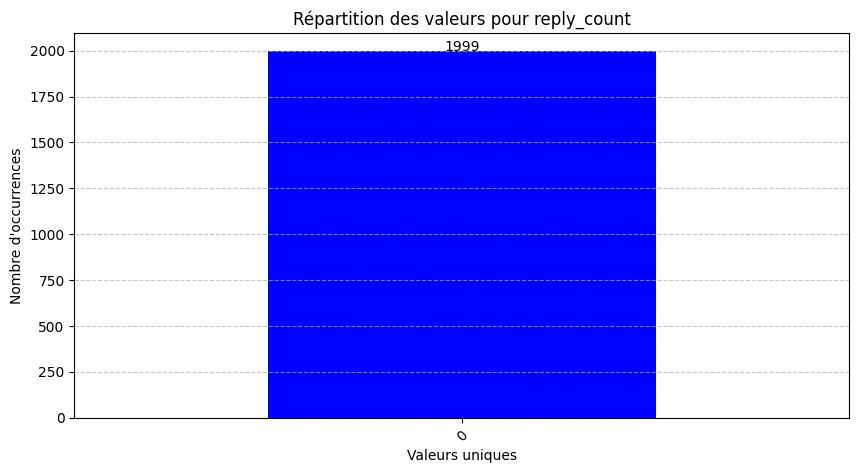

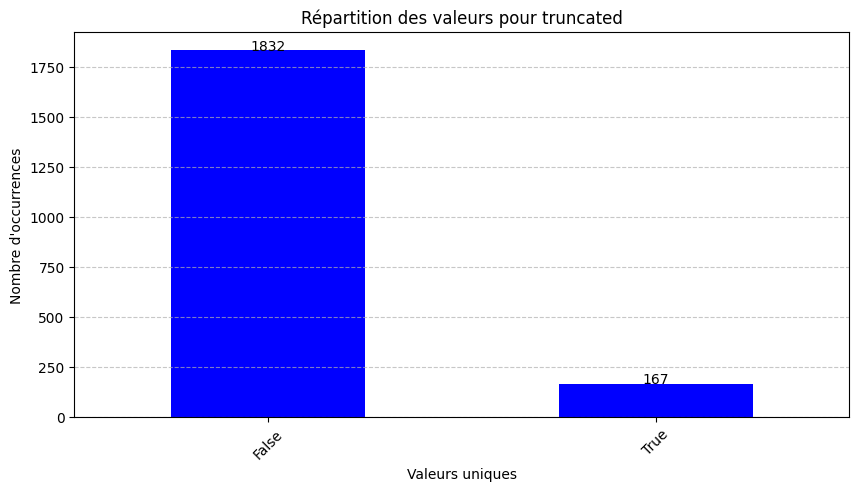

In [18]:
def plot_value_counts(df, variables):
    for var in variables:
        if var in df.columns:
            value_counts = df[var].value_counts()

            plt.figure(figsize=(10, 5))
            value_counts.plot(kind='bar', color='blue')
            plt.title(f"Répartition des valeurs pour {var}")
            plt.xlabel("Valeurs uniques")
            plt.ylabel("Nombre d'occurrences")
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)

            # Affichage des valeurs au-dessus des barres
            for i, v in enumerate(value_counts):
                plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

            plt.show()

# Exemple d'utilisation avec un DataFrame et une liste de variables
variables = ['favorite_count', 'favorited', 'quote_count', 'reply_count', 'truncated']
plot_value_counts(df, variables)


## Contenu du tweet

> text : Texte brut du tweet (peut être tronqué à 140 ou 280 caractères).

> extended_tweet : Si le tweet est tronqué, cet objet contient le texte complet et d’autres métadonnées.

> entities : Contient des informations sur les URLs, hashtags, utilisateurs mentionnés et médias attachés.

> display_text_range : Index où commence et finit le texte affiché

In [19]:
df[['text', 'extended_tweet', 'entities', 'display_text_range']].head(5)

,text,extended_tweet,entities,display_text_range
0,RT @HoustonRockets: The 2026 #WorldCup is retu...,NaN,"{'urls': [], 'hashtags': [{'indices': [29, 38]...",NaN
1,Aula! Nós somos a história! https://t.co/x0r46...,NaN,{'urls': [{'display_url': 'twitter.com/flubase...,"[0, 27]"
2,RT @RattoNBCS: Narnia. https://t.co/VvpjQODpcw,NaN,{'urls': [{'display_url': 'twitter.com/ESPNLos...,NaN
3,RT @irashediat: يالسعودي \nعاند الروس العنيده\...,NaN,"{'urls': [], 'hashtags': [{'indices': [108, 11...",NaN
4,RT @SjorsvanVeen: LVG is supporting #MAR at th...,NaN,"{'urls': [], 'hashtags': [{'indices': [36, 40]...",NaN


> Nous avons deux variables sur cette liste qui contient plus de 80% de valeurs nulles

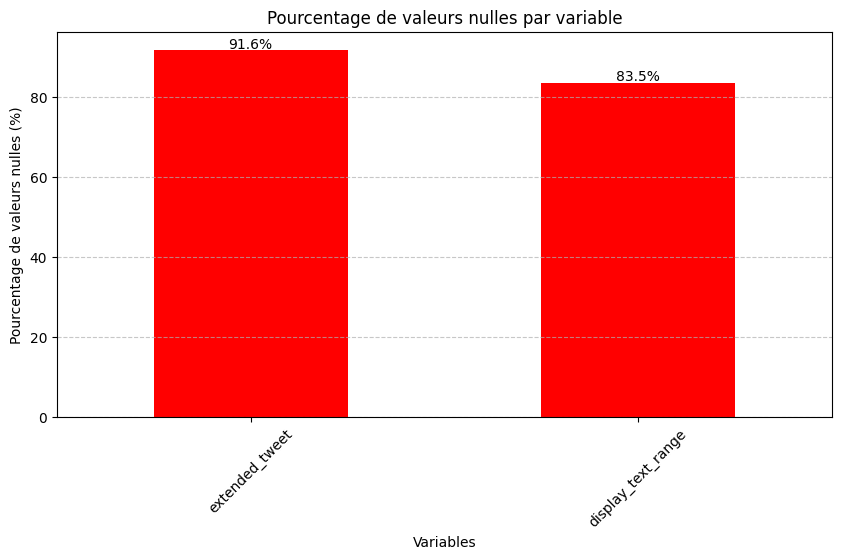

In [20]:
check_null_values(df, ['text', 'extended_tweet', 'entities', 'display_text_range'])

## Informations sur le tweet cité

  > quoted_status : Contient les informations du tweet cité (ex. texte, auteur, engagement).
  
  > quoted_status_id : ID du tweet cité.
  
  > quoted_status_id_str : ID du tweet cité au format texte.
  
  > quoted_status_permalink : URL du tweet cité.
    
  > possibly_sensitive : Booléen indiquant si le tweet contient du contenu sensible.

In [22]:
df[['quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'possibly_sensitive']].head(5)

,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,possibly_sensitive
0,NaN,NaN,NaN,NaN,NaN
1,{'extended_tweet': {'extended_entities': {'med...,1.007083e+18,1.007083e+18,{'expanded': 'https://twitter.com/flubase/stat...,0.0
2,"{'in_reply_to_status_id_str': None, 'in_reply_...",1.007082e+18,1.007082e+18,{'expanded': 'https://twitter.com/ESPNLosAngel...,0.0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


On constate beaucoup de valeurs nulles pour ces variables

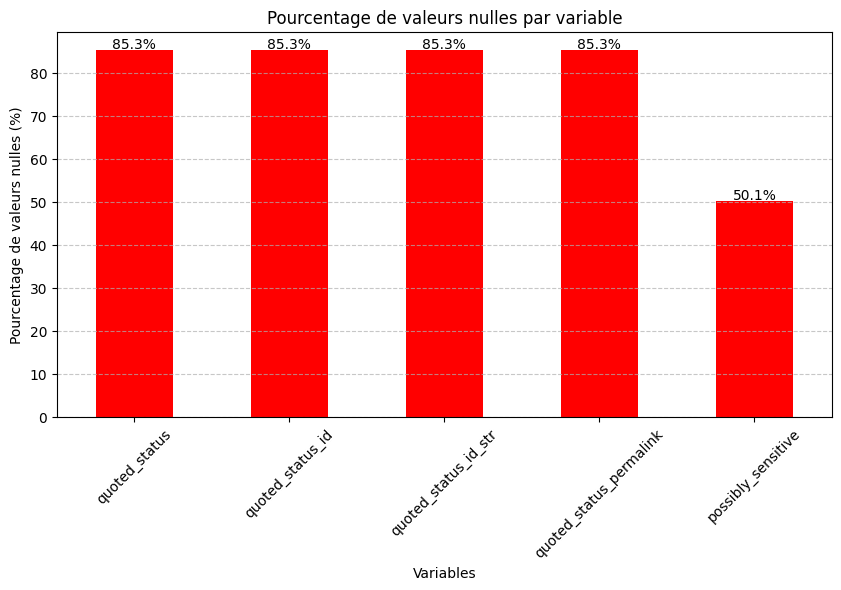

In [24]:
check_null_values(df, ['quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'possibly_sensitive'])

## Informations sur l’utilisateur


> user : Objet contenant toutes les informations sur l’auteur du tweet

> contributors : Liste des contributeurs ayant participé à ce tweet (généralement vide, car Twitter n’autorise plus les tweets collaboratifs).

In [25]:
df[['user', 'contributors']].head(5)

,user,contributors
0,"{'utc_offset': None, 'friends_count': 826, 'pr...",NaN
1,"{'utc_offset': None, 'friends_count': 686, 'pr...",NaN
2,"{'utc_offset': None, 'friends_count': 44, 'pro...",NaN
3,"{'utc_offset': None, 'friends_count': 3189, 'p...",NaN
4,"{'utc_offset': None, 'friends_count': 407, 'pr...",NaN


## Informations sur les médias et contenu enrichi

> extended_entities : Informations supplémentaires sur les médias inclus dans le tweet (images, vidéos, GIFs).

In [28]:
df[['extended_entities']].head(5)

,extended_entities
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


# Data Mining